In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Load Data

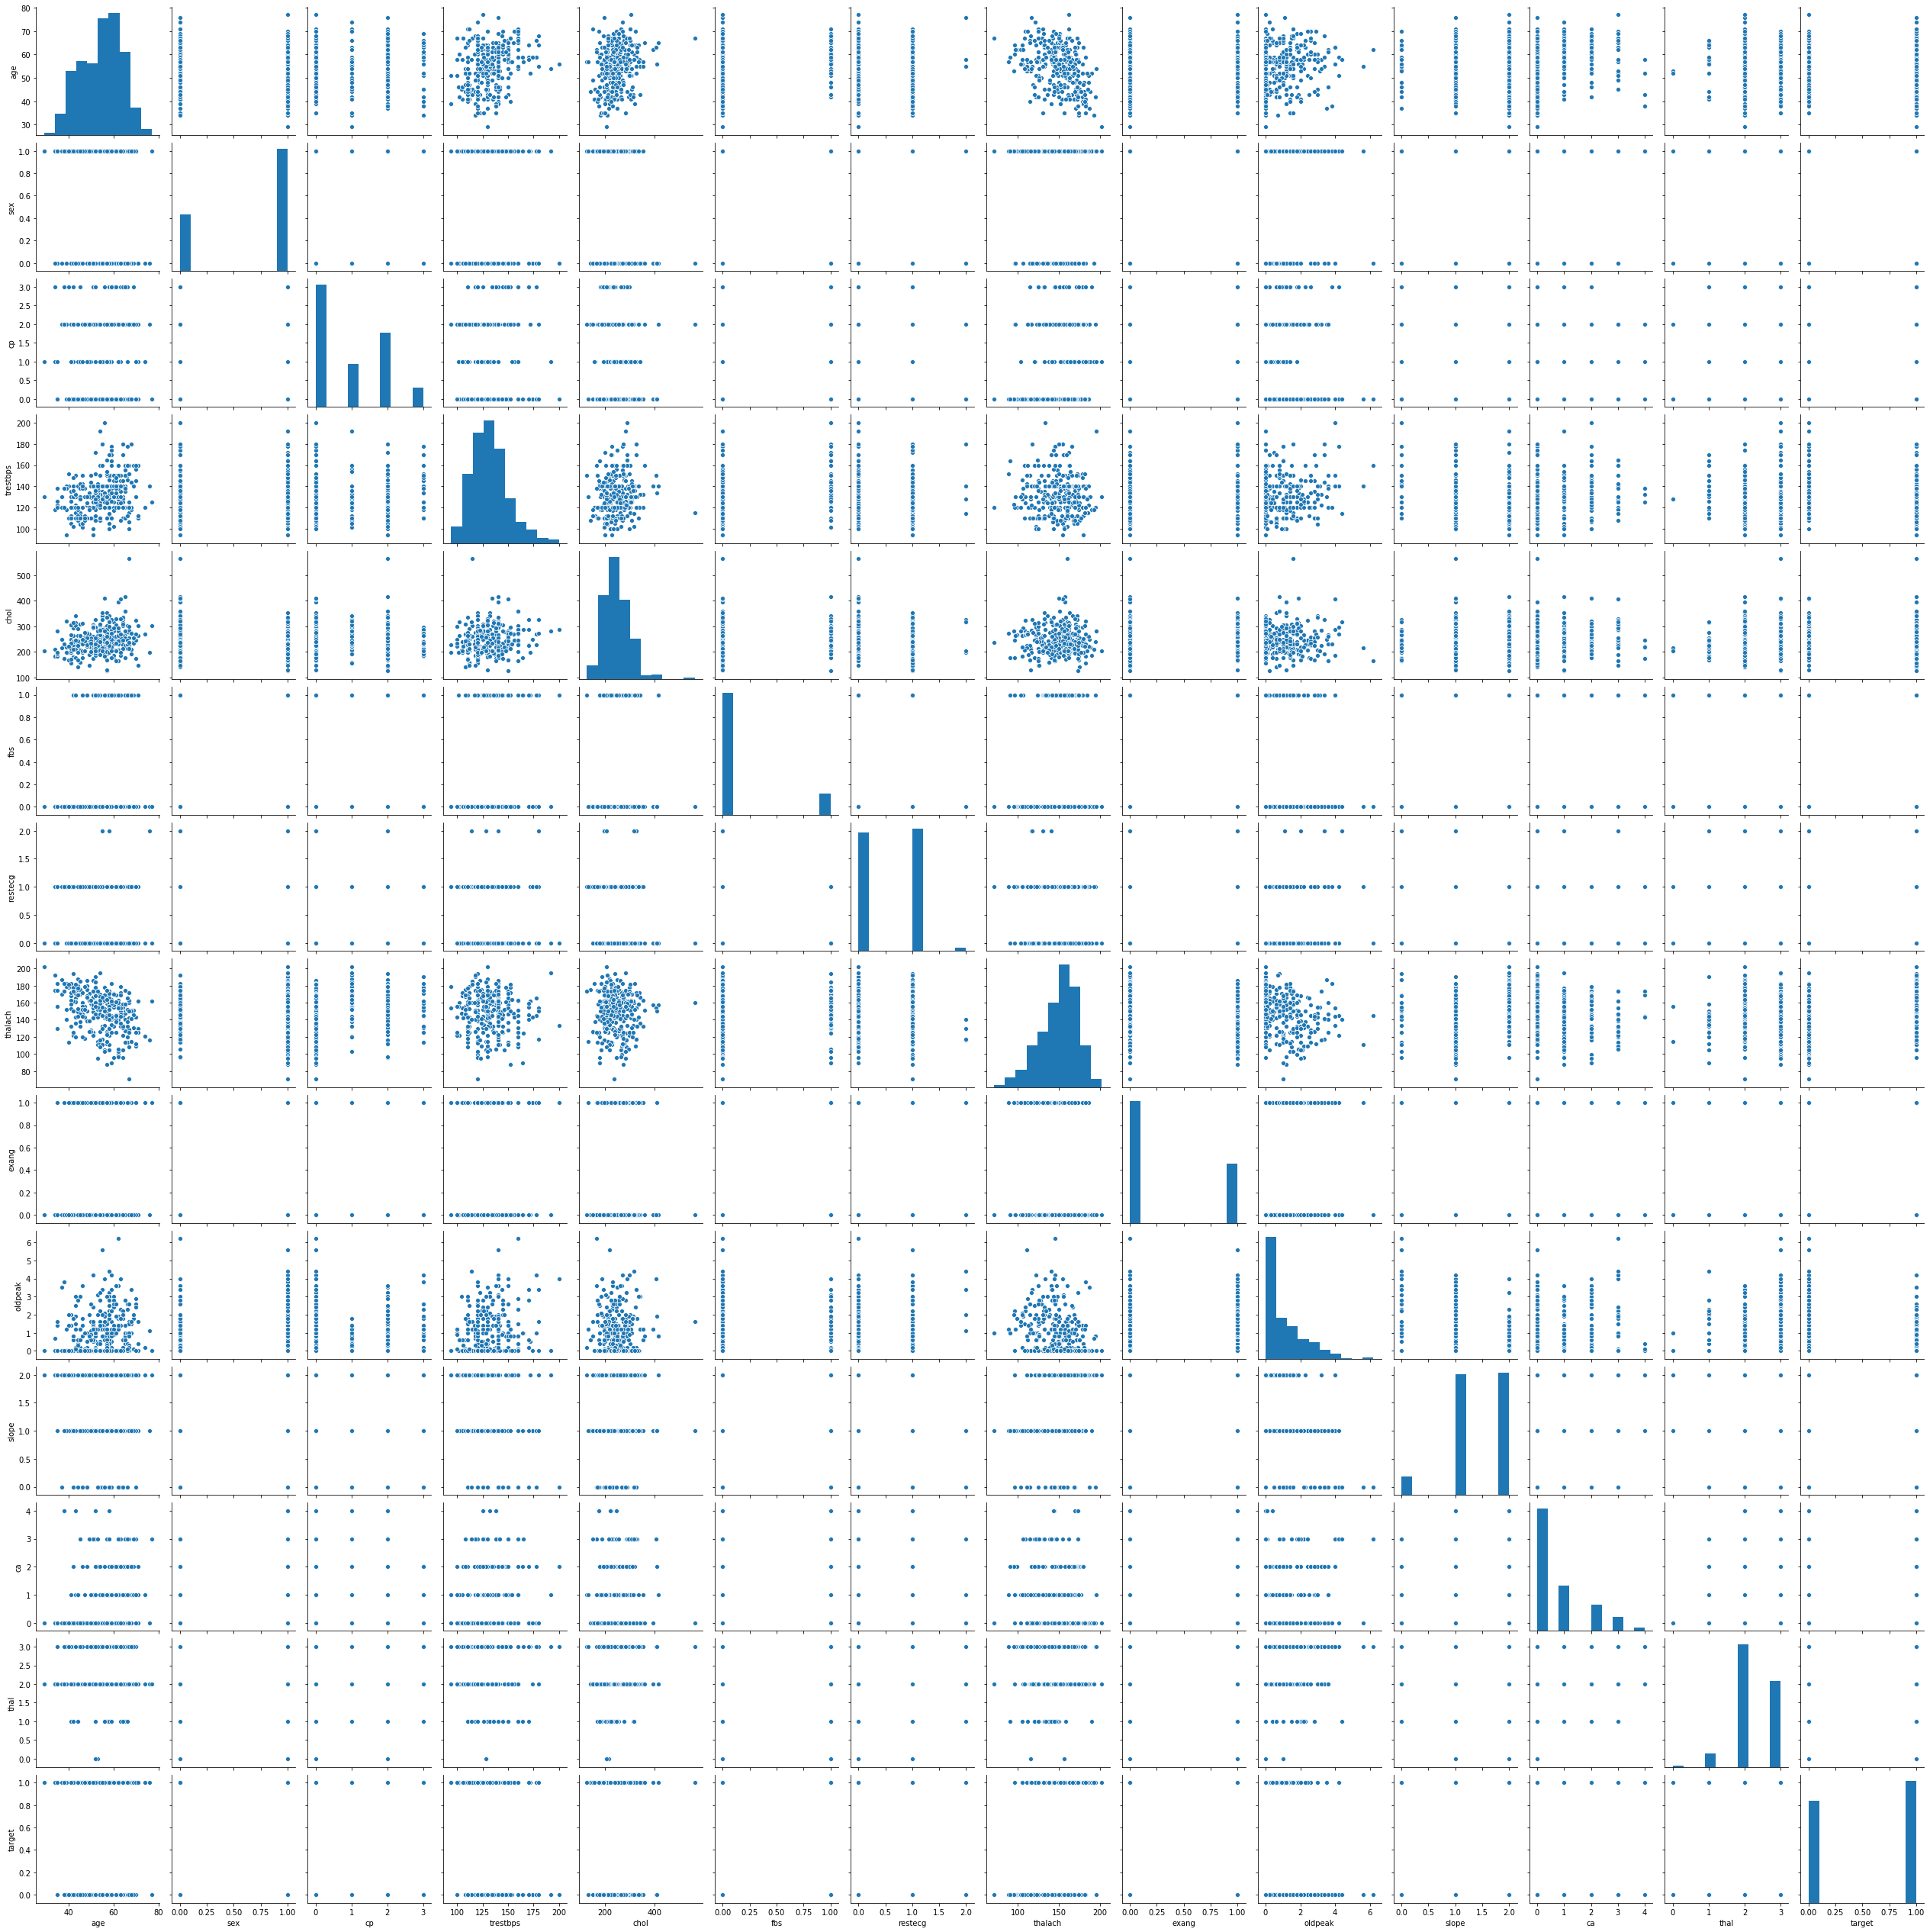

In [4]:
df = pd.read_csv('./heart_disease.csv')

import seaborn as sns

sns.pairplot(df)

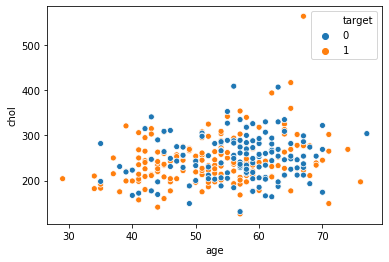

In [5]:
sns.scatterplot(x=df['age'], y=df['chol'], hue=df['target'])

## Classification

In [6]:
# Define data

y = df['target']

x = df.drop(['target'], axis=1)

# Split features into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
y_test_predict = model.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_predict)

array([[20, 10],
       [ 4, 27]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predict))

precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [10]:
from sklearn.metrics import roc_auc_score

print('AUC Score (Logistic Regression):')
roc_auc_score(y_test, y_test_predict)

AUC Score (Logistic Regression):


0.7688172043010754

## Naive Bayes

### Naive Bayes - Guassian

In [12]:
from sklearn.naive_bayes import GaussianNB


model_nb = GaussianNB().fit(x_train, y_train)
y_test_predict = model_nb.predict(x_test)


print('Results from (Naive Bayes - Guassian):')
print('Classification Report:')

print(classification_report(y_test, y_test_predict))
print('AUC Score:')
print(roc_auc_score(y_test, y_test_predict))

Results from (Naive Bayes - Guassian):
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

AUC Score:
0.7698924731182796


### Naive Bayes - Bernoulli

In [15]:
from sklearn.naive_bayes import BernoulliNB


model_nb = BernoulliNB(binarize=True).fit(x_train, y_train)
y_test_predict = model_nb.predict(x_test)


print('Results from (Naive Bayes - Bernoulli):')
print('Classification Report:')

print(classification_report(y_test, y_test_predict))
print('AUC Score:')
print(roc_auc_score(y_test, y_test_predict))

Results from (Naive Bayes - Bernoulli):
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.75      0.77      0.76        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

AUC Score:
0.7537634408602152


### Naive Bayes - Multinomial

In [19]:
from sklearn.naive_bayes import MultinomialNB


model_nb = MultinomialNB().fit(x_train, y_train)
y_test_predict = model_nb.predict(x_test)


print('Results from (Naive Bayes - Multinomial):')
print('Classification Report:')

print(classification_report(y_test, y_test_predict))
print('AUC Score:')
print(roc_auc_score(y_test, y_test_predict))

Results from (Naive Bayes - Multinomial):
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

AUC Score:
0.6881720430107527


## Rebuild Naive Bayes - after scalling data between 0 and 1

In [22]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(scalar.transform(x), y, test_size=.2, random_state=1)

from sklearn.naive_bayes import MultinomialNB


model_nb = MultinomialNB().fit(x_train, y_train)
y_test_predict = model_nb.predict(x_test)


print('Results from (Naive Bayes - Multinomial):')
print('Classification Report:')

print(classification_report(y_test, y_test_predict))
print('AUC Score:')
print(roc_auc_score(y_test, y_test_predict))

Results from (Naive Bayes - Multinomial):
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.69      0.81      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61

AUC Score:
0.7198924731182795


## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

model_svm = SVC().fit(x_train, y_train)
y_test_predict = model_svm.predict(x_test)


print('Results from (Support Vector Machines):')
print('Classification Report:')

print(classification_report(y_test, y_test_predict))
print('AUC Score:')
print(roc_auc_score(y_test, y_test_predict))